In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(train_image,train_label),(test_image,test_label) = tf.keras.datasets.fashion_mnist.load_data()

In [9]:
pd.DataFrame(train_label)[0].value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: 0, dtype: int64

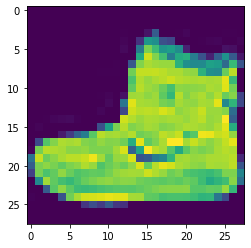

In [13]:
plt.imshow(train_image[0])

In [3]:
train_image = train_image/255
test_image = test_image/255

In [15]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) #28*28
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

#### label使用数字编码时，sparse_categorical_crossentropy

In [28]:
model.compile(optimizer='adam',loss=tf.keras.losses.sparse_categorical_crossentropy,
             metrics=['acc'])

In [29]:
history = model.fit(train_image,train_label,epochs=50)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 58us/sample - loss: 0.0915 - acc: 0.9652
Epoch 2/50
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0863 - acc: 0.9667
Epoch 3/50
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0899 - acc: 0.9663
Epoch 4/50
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0879 - acc: 0.9671
Epoch 5/50
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0839 - acc: 0.9684
Epoch 6/50
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0843 - acc: 0.9680
Epoch 7/50
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0842 - acc: 0.9680
Epoch 8/50
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0759 - acc: 0.9707
Epoch 9/50
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0802 - acc: 0.9696
Epoch 10/50
60000/60000 [==============================] - 

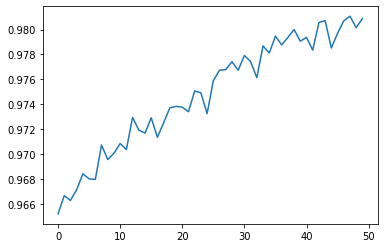

In [30]:
plt.plot(history.epoch,history.history['acc'])

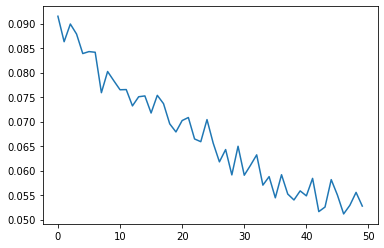

In [31]:
plt.plot(history.epoch,history.history['loss'])

In [32]:
model.evaluate(test_image,test_label)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.031531874576211, 0.8883]

#### label 使用独热编码时 使用categorical_crossentropy

In [4]:
train_label_onehot = tf.keras.utils.to_categorical(train_label)
test_label_onehot = tf.keras.utils.to_categorical(test_label)

In [34]:
train_label_onehot

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model2.add(tf.keras.layers.Dense(128,activation='relu'))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.Dense(128,activation='relu'))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.Dense(10,activation='softmax'))

In [22]:
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss=tf.keras.losses.categorical_crossentropy,
             metrics=['acc'])

In [11]:
history2 = model2.fit(train_image,train_label_onehot,epochs=25)

Train on 60000 samples
Epoch 1/25
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3883 - acc: 0.8630
Epoch 2/25
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3655 - acc: 0.8697
Epoch 3/25
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3490 - acc: 0.8736
Epoch 4/25
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3351 - acc: 0.8806
Epoch 5/25
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3238 - acc: 0.8831
Epoch 6/25
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3136 - acc: 0.8871
Epoch 7/25
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3049 - acc: 0.8899
Epoch 8/25
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2966 - acc: 0.8927
Epoch 9/25
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2892 - acc: 0.8952
Epoch 10/25
60000/60000 [==============================] - 

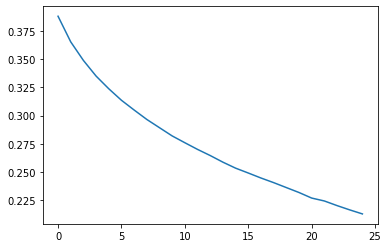

In [12]:
plt.plot(history2.epoch,history2.history['loss'])

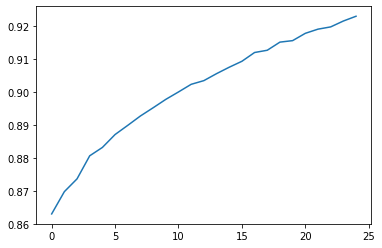

In [13]:
plt.plot(history2.epoch,history2.history['acc'])

In [14]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [27]:
history = model2.fit(train_image,train_label_onehot,epochs=20,
                    validation_data = (test_image,test_label_onehot))

TypeError: Unrecognized keyword arguments: {'metrics': ['acc']}

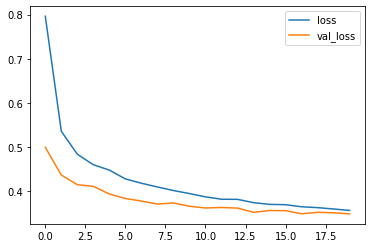

In [24]:
plt.plot(history.epoch,history.history.get('loss'),label='loss')
plt.plot(history.epoch,history.history.get('val_loss'),label='val_loss')
plt.legend()

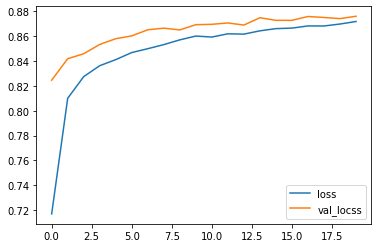

In [28]:
plt.plot(history.epoch,history.history.get('acc'),label='loss')
plt.plot(history.epoch,history.history.get('val_acc'),label='val_locss')
plt.legend()